# Prediction of the Effectiveness of a Marketing Campaign using a Cost-Sensitive Decision Tree

In this Notebook I am going to analyze the effectiveness of a bank telemarketing campaing. The data was extracted from the Machine Learning Repository of University of California Irvine. The task in this dataset is to predict whatever a telemarketing campaing will success or will not. The campaing was led for a Portuguese Bank. Basically, an operator makes a phone to a client and then the operator ask to him/her if would like to suscribe to a product (bank term deposit). So the goal is predict if a given client will suscribe to the term deposit or not.

Since this dataset is an imbalanced one, I will use a Cost-Sensitive approach for dealing this issue. The algorithm chosen was a standard Decision Tree because the literature shows that perform very well in this cases. Typically, Ensemble Decision Trees (such Random Forest, Gradient Boosting) perform better than a single Decision Tree. However, these algorithms usually are biased for the majority class. So this was the reason for my choice. Let's jump in to the code:

# 1. Getting started

The Python Libraries are the following:

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

The dataset is stored in an Excel file. So I am going to use Pandas for reading and storing the file in a Pandas DataFrame:

In [2]:
#Reading Excel
dataset = pd.read_excel("C:/Diego/Estudio/General y obras/PYTHON PROGRAMACION/POO/Machine Learning/Task in dataset/Bank Marketing/Bank-full.xlsx")

# 2. Data Exploration

First of all, we need to understand our data and what are the principal features:

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Here we can see a general explanation about the features:

1. age (no need of further explanation)

2. job: type of job (example: admin, blue-collar, entrepreneur, housemaid, management, etc)

3. marital: marital status (example: divorce, married, single)

4. education (example: high.school, university degree)

5. default: has credit in default? (answer: yes or no)

6. housing: has housing loan? (answer: yes or no)

7. loan: has personal loan? (answer: yes or no)

8. contact: contact communication type (example: cellular,telephone, etc)

9. month: last contact month of year (example: jan, feb, mar, ..., nov, dec)

10. day_of_week: last contact day of the week (example: mon, tue, wed, thu, fri)

11. duration: last contact duration, in seconds (numeric).

12. campaign: number of contacts performed during this campaign and for this client (numeric)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (example: failure, nonexistent, success)

16. y: target value (yes or no)

The dataset has not any missing value:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Descriptive statistics of the dataset are the following:

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 3. Data Analysis

We could see that the majority of phone calls are failures. This is a clear imbalanced dataset: 

In [6]:
#Counting the values in the target feature
Target = dataset["y"]
Target.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Let's plotting the target feature:

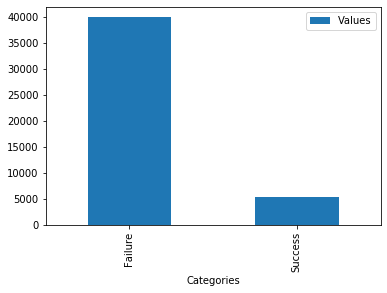

In [7]:
#Plotting the target
Data_Target = {"Categories":["Failure","Success"] , "Values":[39922,5289]}
Plot_Target = pd.DataFrame(data = Data_Target)
Plot_Target.plot(x = "Categories", y = "Values", kind = "bar")
plt.show()

The majority of bank clients have at least secondary education:

In [8]:
#Counting eduaction
Education = dataset["education"]
Education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Let's plotting the education feature:

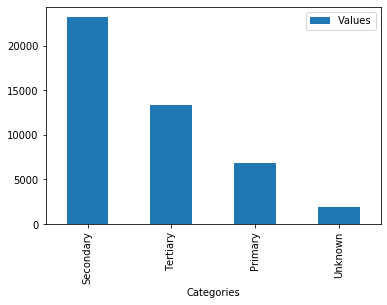

In [9]:
#Plotting education
Data_Education = {"Categories":["Secondary","Tertiary","Primary","Unknown"] , "Values":[23202,13301,6851,1857]}
Plot_Education = pd.DataFrame(data = Data_Education)
Plot_Education.plot(x = "Categories", y = "Values", kind = "bar")
plt.show()

The jobs of the bank clients are large. The majority of thems are blue-collars workers. Other are in management positions. We could see a brief description here:

In [10]:
#Counting jobs
Job = dataset["job"]
Job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

We are going to plot the job feature:

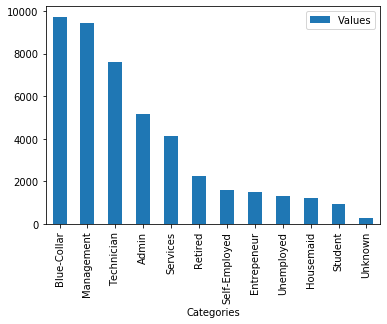

In [11]:
#Plotting the job
Data_Job = {"Categories": ["Blue-Collar", "Management", "Technician", "Admin", "Services", "Retired", "Self-Employed", "Entrepeneur", "Unemployed", "Housemaid", "Student", "Unknown"], "Values": [9732, 9458, 7597, 5171, 4154, 2264, 1579, 1487, 1303, 1240, 938, 288]}
Plot_Job = pd.DataFrame(data = Data_Job)
Plot_Job.plot(x = "Categories", y = "Values", kind = "bar")
plt.show()

Again, the majority of clients do not have personal loans with the bank:

In [12]:
#Counting loans
Loan = dataset["loan"]
Loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

For a better understanding, we are going to plot the loan feature:

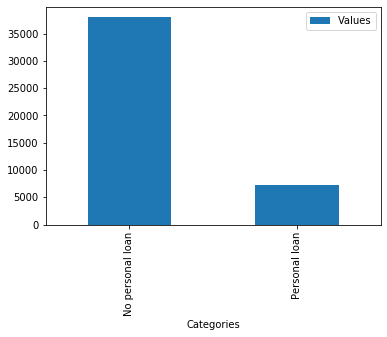

In [13]:
#Plotting loans
Data_Loan = {"Categories": ["No personal loan", "Personal loan"], "Values": [37967,7244]}
Plot_Loan = pd.DataFrame(data = Data_Loan)
Plot_Loan.plot(x = "Categories", y = "Values", kind = "bar")
plt.show()

This is the first marketing campaing for many of the bank clients. Here "unknown" means "non existent" basically. Moreover, there are a good number of past success (1511) in the bank target.  

In [14]:
#Counting outcome of previous marketing campaings
Previous_Outcome = dataset["poutcome"]
Previous_Outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Finally, plotting the poutcome feature:

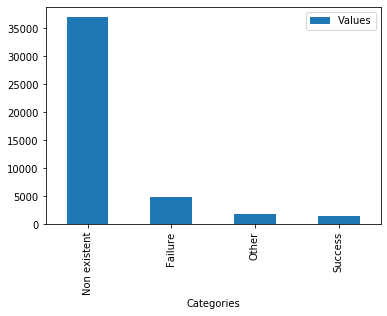

In [15]:
#Plotting outcome of previous marketing campaigns
Data_Previous_Outcome = {"Categories": ["Non existent","Failure","Other","Success"], "Values": [36959,4901,1840,1511]}
Plot_Previous_Outcome = pd.DataFrame(data =Data_Previous_Outcome)
Plot_Previous_Outcome.plot(x = "Categories", y = "Values", kind = "bar")
plt.show()

# 4. Preprocessing and Modeling

Before the feature transformation, we need to separate the predictors (X) from the target (y):

In [16]:
#Separation of X and y
y = dataset["y"]
X = dataset[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]]

Now, we have to split the whole dataset in training and test set:

In [17]:
#Splitting the dasatet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y , random_state = 0)

The next step is feature transformation. I will use Label Encoding for the target variable (y) and One-Hot-Encoding for the predictors (X):

In [18]:
#Label Encoding
Label = LabelEncoder()

#Performing Label Encoding
y_train = Label.fit_transform(y_train)
y_test = Label.fit_transform (y_test)

#Performing One-Hot-Encoding
X_train_processing = pd.get_dummies(X_train[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]])
X_test_processing = pd.get_dummies(X_test[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]])

For the modeling part, I will import a Decision Tree from Sklearn:

In [19]:
#Using cost-sensitive decision tree. This approach can be activated using the parameter class_weight
Tree = DecisionTreeClassifier(max_depth=4, random_state=0, class_weight="balanced")

Subsequently, we need fitting the tree with our data:

In [20]:
#Fitting the Tree
Tree.fit(X_train_processing, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

The previous are the parameters of the Decision Tree.

# 5. Results

#  5.1 Predictions and Metrics

Finally, these are the predictions and the score given for the model:

In [21]:
#Prediction of the class label
Test_Set_Prediction =  Tree.predict(X_test_processing)
print("Class label prediction: ")
print(Test_Set_Prediction)
print("\n")

#Prediction of the probabilities
Test_Set_Prediction_Proba = Tree.predict_proba(X_test_processing)
print("Proba prediction: ")
print(Test_Set_Prediction_Proba)
print("\n")

#Accuracy
Test_Set_Score = Tree.score(X_test_processing, y_test)
print("Accuracy: ")
print(Test_Set_Score)

Class label prediction: 
[0 0 1 ... 0 1 0]


Proba prediction: 
[[0.85565356 0.14434644]
 [0.85565356 0.14434644]
 [0.42863624 0.57136376]
 ...
 [0.85565356 0.14434644]
 [0.42863624 0.57136376]
 [0.85565356 0.14434644]]


Accuracy: 
0.717508626028488


# 5.2 Confusion Matrix

Since this is an imbalanced dataset, we can’t trust very much in the accuracy. So let’s explore the Normalized Confusion Matrix first, and the Area Under Curve of the ROC curve (AUC-ROC) after.

Let’s plotting the Normalized Confusion Matrix with the help of Scikitplot:

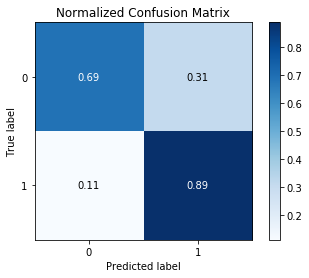

In [22]:
#Matrix
skplt.metrics.plot_confusion_matrix(y_test, Test_Set_Prediction, normalize=True)

A very nice plot!


We could see that the model classifies correctly the 89% of the telemarketing success. The proportion of failures correctly labeled is slightly low, around 70%. I think it is OK for real-world proposes.

# 5.3 AUC-ROC

Now, for a more structured metric, let’s see the AUC-ROC:

In [23]:
#ROC curve builded with class probabilities
proba_roc_curve = metrics.roc_auc_score(y_test, Test_Set_Prediction_Proba[:,1])
print("Proba ROC curve: ")
print(proba_roc_curve)
print("\n")

#ROC curve builded with proper prediction (0 or 1)
standar_roc_curve = metrics.roc_auc_score(y_test, Test_Set_Prediction)
print("Standar ROC curve: ")
print(standar_roc_curve)

Proba ROC curve: 
0.8565136088371232


Standar ROC curve: 
0.79214061937045


Okay, a very good score, considering the results of Moro (2014) in his paper: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

Let’s plotting the ROC curve with the help of Scikitplot:

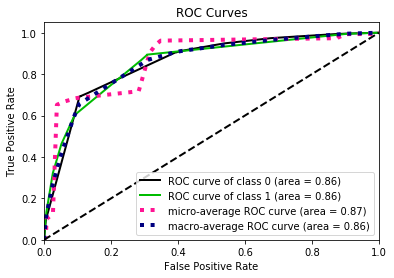

In [24]:
#ROC Curve
skplt.metrics.plot_roc(y_test, Test_Set_Prediction_Proba)

A nice plot of again!

This can confirm the findings at the Confusion Matrix.

# 6. The Final Tree

Finally, it would be great if we could visualize the whole tree:

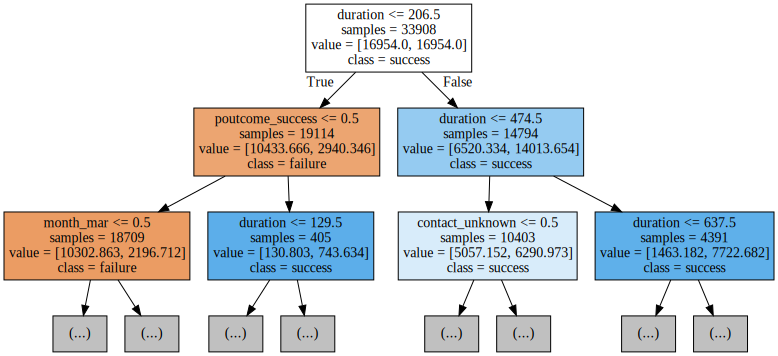

In [25]:
#Plotting the tree
export_graphviz(Tree, out_file="tree.dot", class_names=["failure","success"], max_depth=2, rotate=False, feature_names= X_train_processing.columns ,impurity=False, filled=True)

with open("tree.dot") as f:
 dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph

On the other hand, it could be useful for business decision makers to know which predictors (X) are the highest correlated with the telemarketing success. Therefore, plotting the list of feature importance:

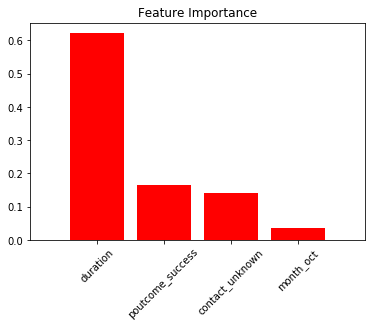

In [26]:
#Feature Importance
skplt.estimators.plot_feature_importances(Tree, title="Feature Importance", x_tick_rotation=45, max_num_features=4, feature_names = X_train_processing.columns)

If you have read up to here, I really appreciate any feedback of you. I am a truly passionate about Data Science and Machine Learning so all type of comments are welcomed.